### Analyzing CIA Factbook Data Using SQL

This guided project works with the data from the CIA World Factbook - it is a compliation of statistics about all countries on Earth. The Factbook contains demographic information like the following:

* population - the global population
* population_growth - the annual population growth rate, as a percentage
* area - the total land and water area.

If you want to replicate this project, you cand download the SQLite file [here](https://dsserver-prod-resources-1.s3.amazonaws.com/257/factbook.db) and follow the steps below.

Before we begin entering queries, we must run a code to install sql in jupyter.

In [1]:
!pip install ipython-sql

After running our code, we will be able to load .db file. Your .db file and your active jupyter notebook (the one you will be wokring with) should be saved in the same location. Running the code below, we should then able to examine our data.


In [2]:
%%capture
%load_ext sql
%sql sqlite:///factbook.db

In [6]:
%%sql

SELECT *
  FROM sqlite_master
 WHERE type='table';

 * sqlite:///factbook.db
Done.


type,name,tbl_name,rootpage,sql
table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
table,facts,facts,47,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL, ""code"" varchar(255) NOT NULL, ""name"" varchar(255) NOT NULL, ""area"" integer, ""area_land"" integer, ""area_water"" integer, ""population"" integer, ""population_growth"" float, ""birth_rate"" float, ""death_rate"" float, ""migration_rate"" float)"


As we can see, the above query successfully returned data; this indicates we have loaded our data. The query above has allowed us examine our database directly to get information on the tables.

Next, we will ask sql to return the first five rows for the facts table in the datbase. Notice how there are two tables in our database; sqlite_sequence and facts.

In [7]:
%%sql

SELECT *
    FROM facts
    LIMIT 5;

 * sqlite:///factbook.db
Done.


id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51
2,al,Albania,28748,27398,1350,3029278,0.3,12.92,6.58,3.3
3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92
4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.0
5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46


In [9]:
%%sql

SELECT *
    FROM sqlite_sequence
    LIMIT 5;

 * sqlite:///factbook.db
Done.


name,seq
facts,261


If we try to run the same query for our 'sqlite_sequence' we can see that it only retrieves a shorter table. This indicates that our table is a header table for facts.

Backtracking, let us look at our previous table again.

In [10]:
%%sql

SELECT *
    FROM facts
    LIMIT 5;

 * sqlite:///factbook.db
Done.


id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51
2,al,Albania,28748,27398,1350,3029278,0.3,12.92,6.58,3.3
3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92
4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.0
5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46


From our table we can see a number of different columns:

    * name — the name of the country.
    * area— the country's total area (both land and water).
    * area_land — the country's land area in square kilometers.
    * area_water — the country's waterarea in square kilometers.
    * population — the country's population.
    * population_growth— the country's population growth as a percentage.
    * birth_rate — the country's birth rate, or the number of births per year per 1,000 people.
    * death_rate — the country's death rate, or the number of death per year per 1,000 people.
    
Because this is only a small snapshot of our data, we will calculate some summary statistics and look for any other outlier countries, we will start by finding out the following:
    * minimum population
    * maximum population
    * minimum population growth
    * maximum population growth

In [11]:
%%sql

SELECT MIN(population), MAX(population), MIN(population_growth), MAX(population_growth)
       FROM facts;

 * sqlite:///factbook.db
Done.


MIN(population),MAX(population),MIN(population_growth),MAX(population_growth)
0,7256490011,0.0,4.02


From the above query, we see that there is a country with a population of 0 and a country with a population of 7,256,490,011. However, this query does not tell us what those countries are. We will use the following queries to get information on these countries:

    * a query that returns the countries with the minimum population
    * a query that returns the countries with the maximum population

In [19]:
%%sql

SELECT *
       FROM facts
       WHERE population == (SELECT MIN(population)
                                FROM facts
                           );

 * sqlite:///factbook.db
Done.


id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
250,ay,Antarctica,None,280000,None,0,None,None,None,None


Based on the CIA Factbook page for Antarctica, the data matches:

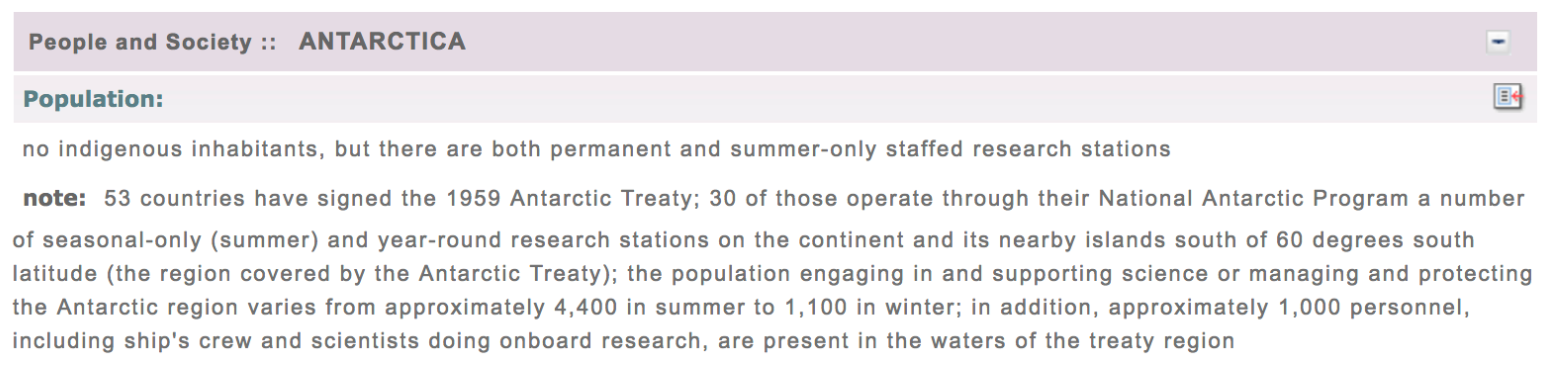

In [20]:
%%sql

SELECT *
    FROM facts
    WHERE population == (SELECT MAX(population)
                             FROM facts
                        );

 * sqlite:///factbook.db
Done.


id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
261,xx,World,None,None,None,7256490011,1.08,18.6,7.8,None


For the above query, we notice the maximum population is not represented by one country, it is represented by the whole world.
Knowing this, we will be revisiting our summary statistics from earlier EXCEPT, we will be excluding the row for the whole world.

## Summary Statistics Revisited

In [22]:
%%sql

SELECT MIN(population), MAX(population), MIN(population_growth), MAX(population_growth)
       FROM facts
       WHERE name != 'World';

 * sqlite:///factbook.db
Done.


MIN(population),MAX(population),MIN(population_growth),MAX(population_growth)
0,1367485388,0.0,4.02


After we exclude the whole world we can see that there is a country that has a population close to 1.4 billion.

Our next queries will calculate the average value for the following columns: population and area.

# Exploring Average Population and Area

In [25]:
 %%sql

SELECT AVG(population) AS avg_population, AVG(area) AS avg_area
       FROM facts
       WHERE name != 'World';

 * sqlite:///factbook.db
Done.


avg_population,avg_area
32242666.56846473,555093.546184739


After we exclude the world, we can see the average population is around 32 million and the average area is 555 thousand square kilometers.

# Finding Densly Populated Countries

Next, we will find all the countries that meet both of the following criteria

In [75]:
%%sql

SELECT *
       FROM facts
       WHERE population > (SELECT AVG(population)
                                  FROM facts
                                  WHERE name != 'World'
                          )
        AND area <  (SELECT AVG(area)
                            FROM facts
                            WHERE name != 'World'
                    );

 * sqlite:///factbook.db
Done.


id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
14,bg,Bangladesh,148460,130170,18290,168957745,1.6,21.14,5.61,0.46
65,gm,Germany,357022,348672,8350,80854408,0.17,8.47,11.42,1.24
80,iz,Iraq,438317,437367,950,37056169,2.93,31.45,3.77,1.62
83,it,Italy,301340,294140,7200,61855120,0.27,8.74,10.19,4.1
85,ja,Japan,377915,364485,13430,126919659,0.16,7.93,9.51,0.0
91,ks,"Korea, South",99720,96920,2800,49115196,0.14,8.19,6.75,0.0
120,mo,Morocco,446550,446300,250,33322699,1.0,18.2,4.81,3.36
138,rp,Philippines,300000,298170,1830,100998376,1.61,24.27,6.11,2.09
139,pl,Poland,312685,304255,8430,38562189,0.09,9.74,10.19,0.46
163,sp,Spain,505370,498980,6390,48146134,0.89,9.64,9.04,8.31


Based on our results, these countries are known to be densely populated, so we have more robust data. Let us explore a few more things within this dataset:

    1. Which country has the most people? Which country has the highest growth rate?
    2. Which countries have the highest ratios of water to land? Which countries have more water than land?
    3. Which countries will add the most people to their populations next year?
    4. Which countries have a higher death rate than birth rate?
    5. Which countries have the highest population/area ratio, and how does it compare to list we found in the previous screen?

In [66]:
%%sql

SELECT name, population
     FROM facts
     ORDER BY population DESC;

 * sqlite:///factbook.db
Done.


name,population
World,7256490011
China,1367485388
India,1251695584
European Union,513949445
United States,321368864
Indonesia,255993674
Brazil,204259812
Pakistan,199085847
Nigeria,181562056
Bangladesh,168957745


In [76]:
%%sql

SELECT name, population_growth
     FROM facts
     ORDER BY population_growth DESC;

 * sqlite:///factbook.db
Done.


name,population_growth
South Sudan,4.02
Malawi,3.32
Burundi,3.28
Niger,3.25
Uganda,3.24
Qatar,3.07
Burkina Faso,3.03
Mali,2.98
Cook Islands,2.95
Iraq,2.93


1. With our first query, we can see that China has the most population (1,367,485,388 people) however, South Sudan has the highest population growth (4.02).

In [86]:
%%sql

SELECT name, death_rate, birth_rate
       FROM facts
       WHERE death_rate > birth_rate;

 * sqlite:///factbook.db
Done.


name,death_rate,birth_rate
Austria,9.42,9.41
Belarus,13.36,10.7
Bosnia and Herzegovina,9.75,8.87
Bulgaria,14.44,8.92
Croatia,12.18,9.45
Czech Republic,10.34,9.63
Estonia,12.4,10.51
Germany,11.42,8.47
Greece,11.09,8.66
Hungary,12.73,9.16


2. To compare our ratio of water to land, we are must first determine the ratio of water and land:
    
    * water_ratio = area_water/ area
    * land_ratio = area_ land/ area
    
After we've obtained these values, we can answer the first part of question 2; what countries have the highest ratios of water to land.

In [103]:
SELECT name,
       CAST(area_water AS FLOAT) / CAST(area AS FLOAT) AS water_ratio,
       CAST(area_land AS FLOAT) / CAST(area AS FLOAT) AS land_ratio
       FROM facts;

SyntaxError: invalid syntax (<ipython-input-103-76ed533b8f88>, line 1)

In [102]:
%%sql

SELECT name,
       CAST(area_water AS FLOAT) / CAST(area AS FLOAT) AS water_ratio,
       CAST(area_land AS FLOAT) / CAST(area AS FLOAT) AS land_ratio
       FROM facts
       WHERE water_ratio > land_ratio;

 * sqlite:///factbook.db
Done.


name,water_ratio,land_ratio
British Indian Ocean Territory,0.9988970588235294,0.0011029411764705882
Virgin Islands,0.818848167539267,0.181151832460733


2. From our query, we can see that there are only two countries where the water ratio is higher than the land ratio. In other words, British Indian Ocean Territory and the Virgin Islands are the only two countries which have more water than land.

In [ ]:
%%sql

SELECT 
    FROM facts
    

4. The table above shows us the countries that had a higher death rate than birth rate; there were 24 countries.